In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
import scipy.interpolate

In [11]:
def f(t, a, b, c):
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + 0.5 * np.cos(2 * t)

def plot_with_parameters(a, b, c):
    # Define time range
    t = np.linspace(0, 1, 100)

    # Calculate f(t) for these parameters
    f_values = f(t, a, b, c)

    # Plot the function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.savefig('time_series.png')
    plt.show()

def plot_against_interpolation(a, b, c, f_interpolated):
    t = np.linspace(0, 1, 100)  # Define time range
    f_values = f(t, a, b, c)
    # Plot values and interpolated function
    plt.figure(figsize=(10, 6))
    plt.plot(t, f_values, label=r'$f(t; a, b, c)$', color='blue')
    plt.plot(t, f_interpolated(t), label='Interpolated', color='red', linestyle='dashed')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()


# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

# Display the interactive plot
display(interactive_plot)



interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

## Question 1
Consider all parameter values (except t) are fixed and create an interpolator with respect to time (t). Use the original grid (100 t's between 0 and 1) for the interpolation.

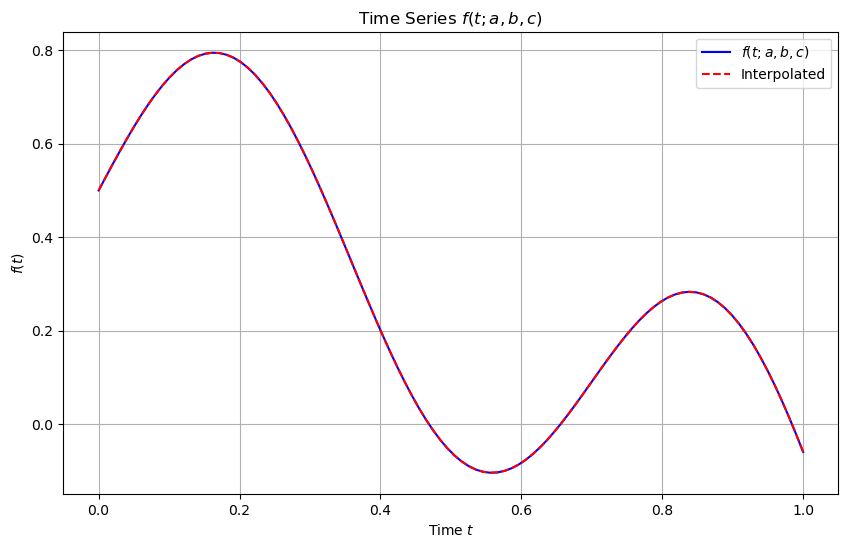

In [15]:
# We define the parameters as fixed values
a = 0.1
b = -0.13
c = 9

# We create an array of 100 t's between 0 and 1 (linear space)
t = np.linspace(0, 1, 100)

# We interpolate the function f(t) for the given parameters
f_values = f(t, a, b, c)

# Interpolate on one-dimensional data (t)
f_interpolated = scipy.interpolate.interp1d(t, f_values, kind='linear')
plot_against_interpolation(a, b, c, f_interpolated)


### Conclusion
On an already fine grid, even with a linear interpolator, the function is already very well interpolated when examined visually.

## Exercise 2
